# Flu Trends - Exploratory Data Analysis

Explore the dataset `flu_trends.csv` to uncover trends, seasonality and other hidden patterns within the data.
The Flu Trends dataset contains records of doctor's visits for the flu for weeks between 2009 and 2016. Our goal is to forecast the number of flu cases for the coming weeks.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

# Import Package Modules
from src.general_utils.general_utils import (
    read_configuration, 
    read_data_from_config
)
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    set_plot_characteristics,
    plot_time_series,
    plot_predictions_vs_time_series, 
    plot_moving_average,
    plot_lags_series
)

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'flu_trends_config.yaml')

# Extract configuration variables
dataset_config = config['dataset_config']
plot_characteristics = config['plot_characteristics']

[06/27/2024 16:39:02 - general_utils] INFO - read_configuration - Start
[06/27/2024 16:39:02 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml
[06/27/2024 16:39:02 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml read successfully
[06/27/2024 16:39:02 - general_utils] INFO - read_configuration - End


## Setup Plot Characteristics

In [3]:
set_plot_characteristics(plot_characteristics)

[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read dataset
dataset_origin = read_data_from_config(dataset_config)

[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - Start
[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/27/2024 16:39:02 - general_utils] INFO - build_path_from_list - Start
[06/27/2024 16:39:02 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/27/2024 16:39:02 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/27/2024 16:39:02 - general_utils] INFO - build_path_from_list - End
[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/flu_trends.csv
[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - Reading data with date columns
[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - Successfully read data with 366 rows and 131 columns
[06/27/2024 16:39:02 - general_utils] INFO - read_data_from_config - End


In [5]:
# Select only relevant columns
dataset = dataset_origin[['Week', 'FluVisits']]

In [6]:
dataset

,Week,FluVisits
0,2009-06-29,180
1,2009-07-06,115
2,2009-07-13,132
3,2009-07-20,109
4,2009-07-27,120
...,...,...
361,2016-05-30,90
362,2016-06-06,55
363,2016-06-13,33
364,2016-06-20,27


# Exploratory Data Analysis

## Plot Time Series

[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/27/2024 16:39:02 - exploratory_data_analysis_utils] INFO - plot_time_series - Calling the plt.show()


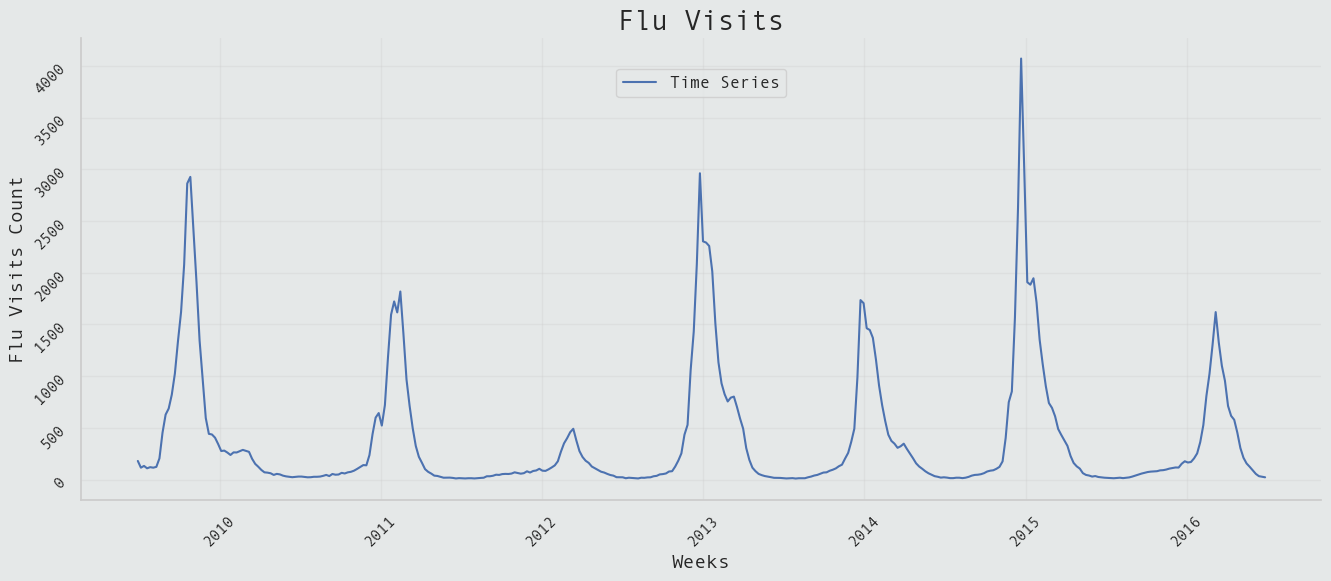

[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_time_series - End


<Figure size 1600x600 with 0 Axes>

In [7]:
ax = plot_time_series(dataset, 
                      columns=('Week', 'FluVisits'), 
                      title='Flu Visits', 
                      labels=('Weeks', 'Flu Visits Count', 'Time Series'), 
                      to_plot=True)

- The Time Series shows irregular cycles instead of a regular seasonality: peaks are not always exactly at the start of the year, but sometimes they are before or after.

## Moving Average

[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Start
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Setting index
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Computing the moving average
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot time series
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot moving average
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - Set plot configurations


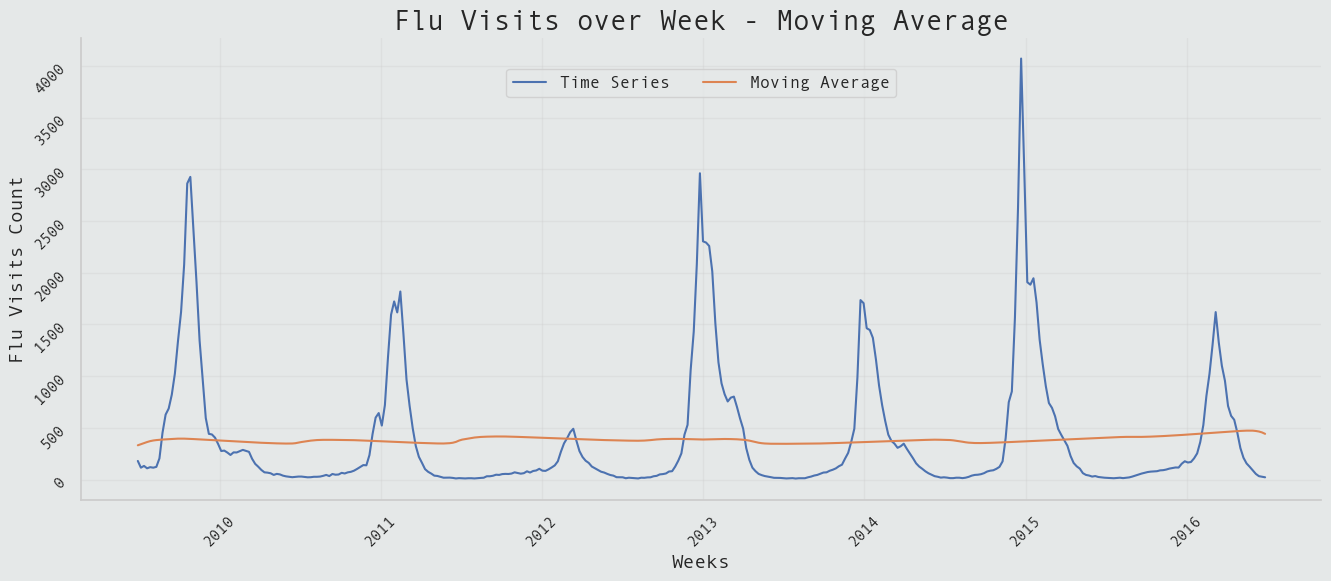

[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_moving_average - End


<Axes: title={'center': 'Flu Visits over Week - Moving Average'}, xlabel='Weeks', ylabel='Flu Visits Count'>

<Figure size 1600x600 with 0 Axes>

In [8]:
plot_moving_average(time_series=dataset, 
                    rolling_settings={
                        'window': 365, 
                        'center': True, 
                        'min_periods': 183}, 
                    columns=('Week', 'FluVisits'), 
                    title='Flu Visits over Week - Moving Average', 
                    labels=('Weeks', 'Flu Visits Count', 'Moving Average'))

## Lag Plot

[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_lags_series - Start
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_single_lag - Start
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_single_lag - Plotting lag 1
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_single_lag - End
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_single_lag - Start
[06/27/2024 16:39:03 - exploratory_data_analysis_utils] INFO - plot_single_lag - Plotting lag 2
[06/27/2024 16:39:04 - exploratory_data_analysis_utils] INFO - plot_single_lag - End
[06/27/2024 16:39:04 - exploratory_data_analysis_utils] INFO - plot_single_lag - Start
[06/27/2024 16:39:04 - exploratory_data_analysis_utils] INFO - plot_single_lag - Plotting lag 3
[06/27/2024 16:39:04 - exploratory_data_analysis_utils] INFO - plot_single_lag - End
[06/27/2024 16:39:04 - exploratory_data_analysis_utils] INFO - plot_single_lag - Start
[06/27/2024 16:39:04 

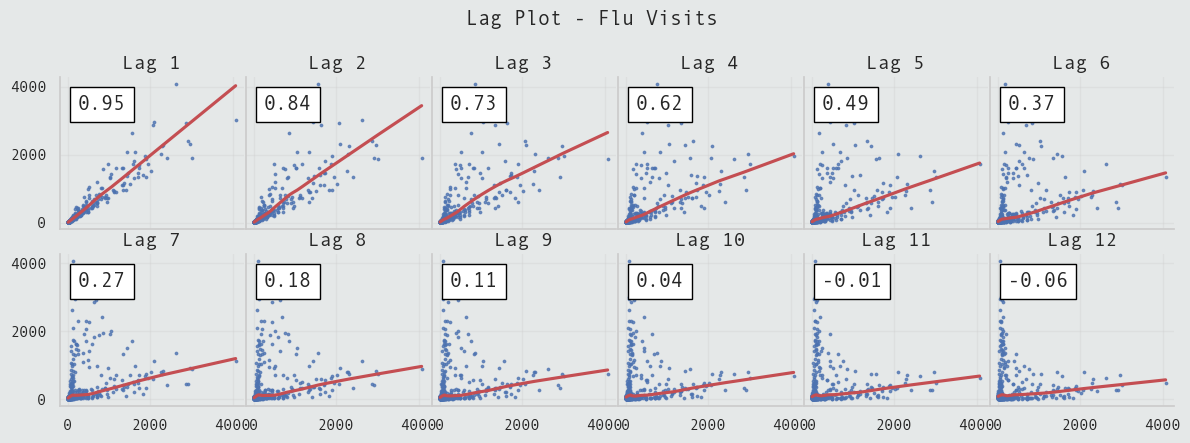

In [9]:
# Plot time series against its lags
_ = plot_lags_series(dataset.FluVisits, number_lags=12, nrows=2, time_series_name='Flu Visits')

## Partial Autocorrelation

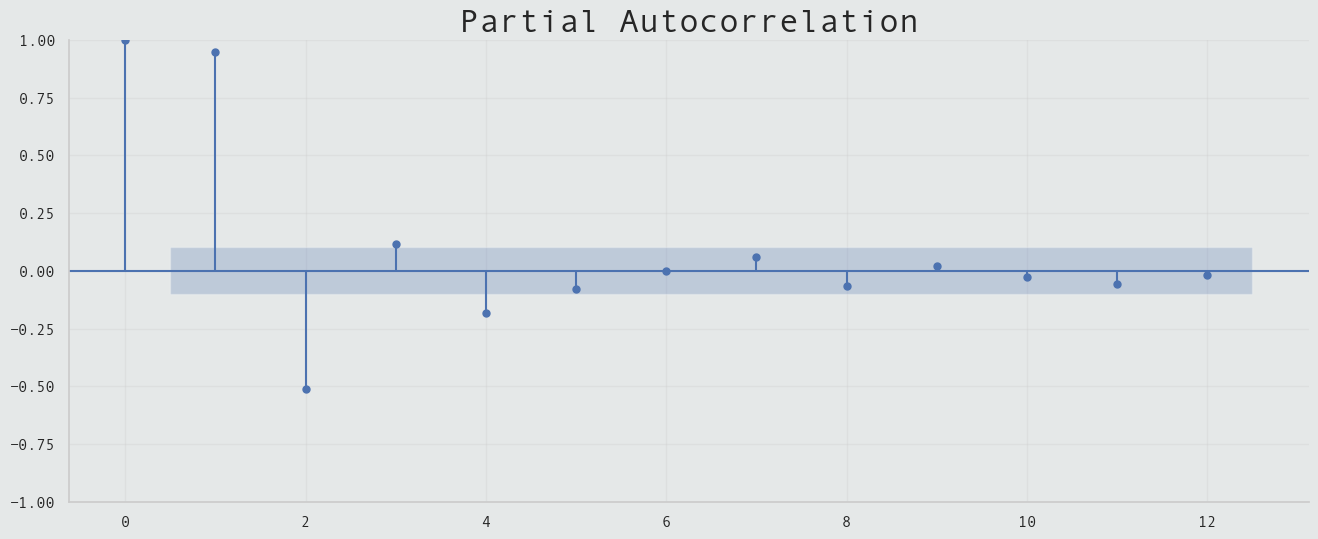

In [10]:
# Plot the Partial Autocorrelation
_ = plot_pacf(dataset.FluVisits, lags=12)

- The Lag plot and Partial Autocorrelation show that the relationship of `FluVisits` to its lags is mostly linear (Lag Plot) and that the dependence can be captured with lags 1, 2, 3 and 4. 


# Data Preparation

## Time-step Feature

In [11]:
# Add 'Time' feature
dataset['Time'] = np.arange(len(dataset))

/var/folders/2t/wgg9ryl91kxd7b51f7g035jsdh30gy/T/ipykernel_91365/527460144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = np.arange(len(dataset))


## Lag Features

In [12]:
# Define the number of lags (from Partial Autocorrelation plot)
number_lags = 4

# Create lag features
for lag_value in range(1, number_lags + 1):
    
    # Create the new lag
    new_lag = dataset.FluVisits.shift(lag_value)
    new_lag_dataframe = pd.DataFrame(new_lag.values, columns=[f'lag_{lag_value}'])
    
    # Concat to the original dataset
    dataset = pd.concat([dataset, new_lag_dataframe], axis=1)
    
# Fill NaN values of lags not available
dataset = dataset.fillna(0.0)

In [13]:
dataset

,Week,FluVisits,Time,lag_1,lag_2,lag_3,lag_4
0,2009-06-29,180,0,0.0,0.0,0.0,0.0
1,2009-07-06,115,1,180.0,0.0,0.0,0.0
2,2009-07-13,132,2,115.0,180.0,0.0,0.0
3,2009-07-20,109,3,132.0,115.0,180.0,0.0
4,2009-07-27,120,4,109.0,132.0,115.0,180.0
...,...,...,...,...,...,...,...
361,2016-05-30,90,361,124.0,156.0,211.0,305.0
362,2016-06-06,55,362,90.0,124.0,156.0,211.0
363,2016-06-13,33,363,55.0,90.0,124.0,156.0
364,2016-06-20,27,364,33.0,55.0,90.0,124.0


# Model Training

## Linear Regression with Time-step Feature

[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Start
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Extract time series and predictions
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot tim series
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot predicted values
[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Calling the plt.show()


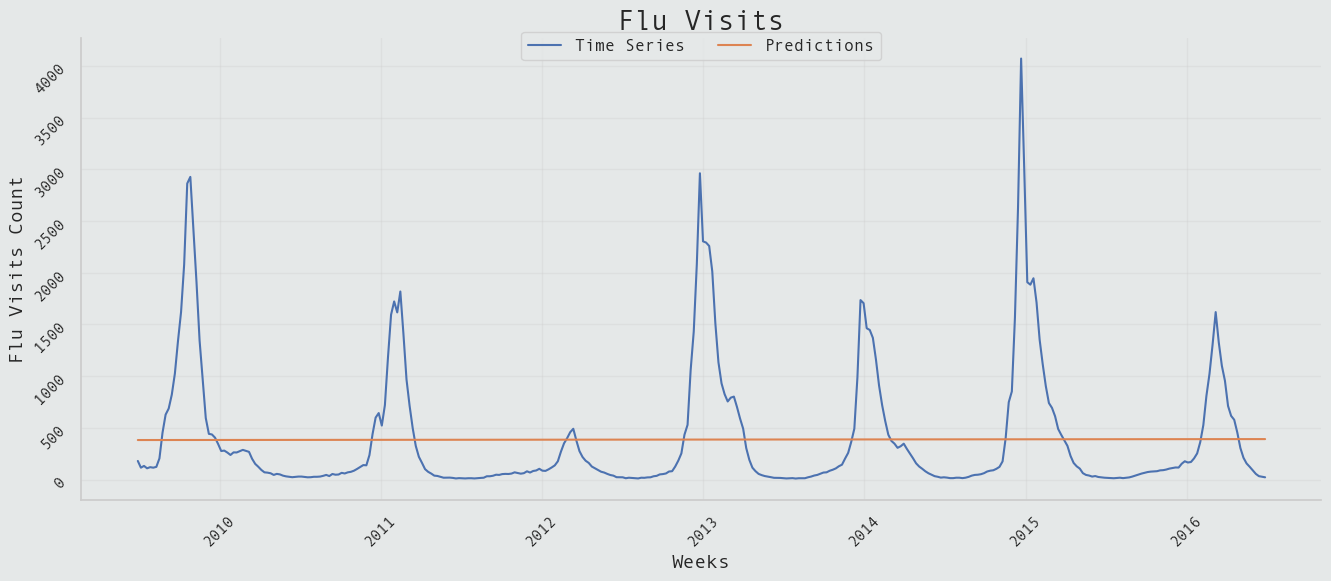

[06/27/2024 16:39:06 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - End


<Axes: title={'center': 'Flu Visits'}, xlabel='Weeks', ylabel='Flu Visits Count'>

<Figure size 1600x600 with 0 Axes>

In [14]:
# Define x, y
x = dataset.loc[:, ['Time']]
y = dataset.loc[:, ['FluVisits']]

# Instance model
model_lr_time_step = LinearRegression()

# Fit model
model_lr_time_step.fit(x, y)

# Produce prediction
predictions_lr_time_step = model_lr_time_step.predict(x)

# Show predictions
plot_predictions_vs_time_series(data=(dataset, predictions_lr_time_step.reshape(-1)),
                                columns=('Week', 'FluVisits'),
                                title='Flu Visits',
                                labels=('Weeks', 'Flu Visits Count', 'Predictions'), 
                                to_plot=True)

## Linear Regression with Lag Features

### Model training

In [15]:
# Define x, y
x = dataset.loc[:, ['lag_1', 'lag_2', 'lag_3', 'lag_4']]
y = dataset.loc[:, ['FluVisits']]

# Split train & test
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=60, 
                                                    shuffle=False)

# Instance model
model_lr_lag_features = LinearRegression()

# Fit model
model_lr_lag_features.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [16]:
y_pred = pd.Series(model_lr_lag_features.predict(x_train).reshape(-1, ), 
                   index=y_train.index)
y_fore = pd.Series(model_lr_lag_features.predict(x_test).reshape(-1, ), 
                   index=y_test.index)

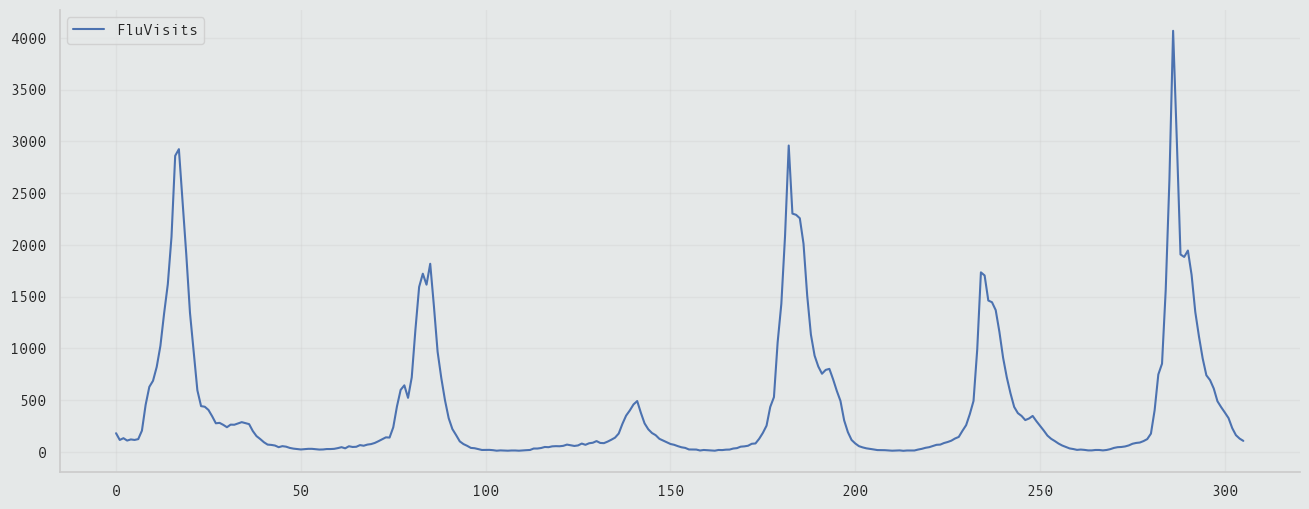

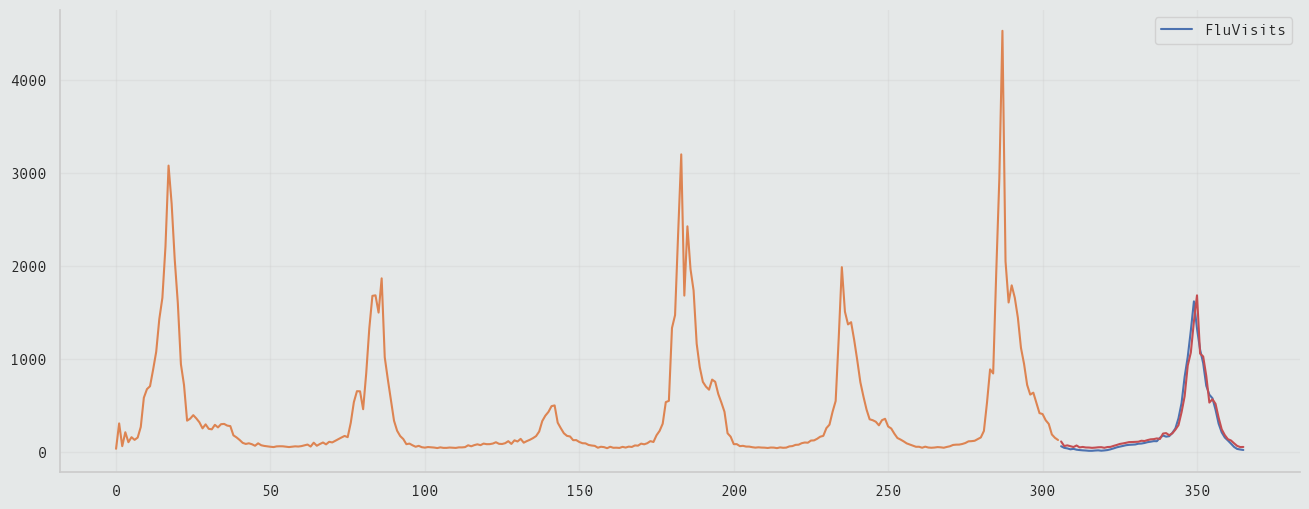

In [17]:
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

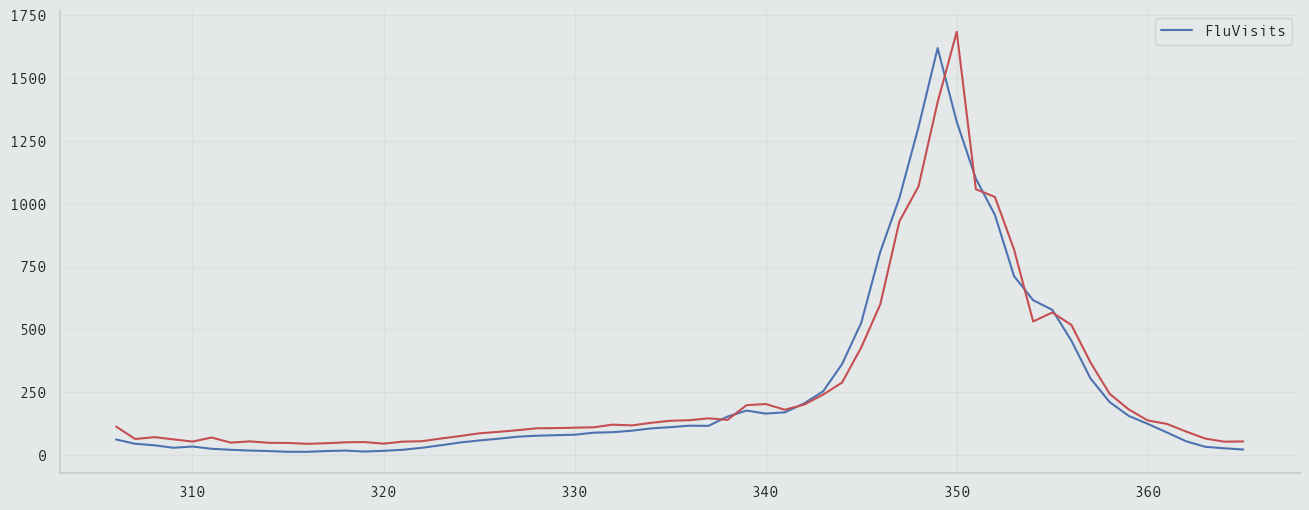

In [18]:
ax = y_test.plot()
_ = y_fore.plot(ax=ax, color='C3')

- As expected, using lag feature implies not being able to capture sudden changes in the time series. Let's explore some *Leading Indicators* for early warning of such changes.

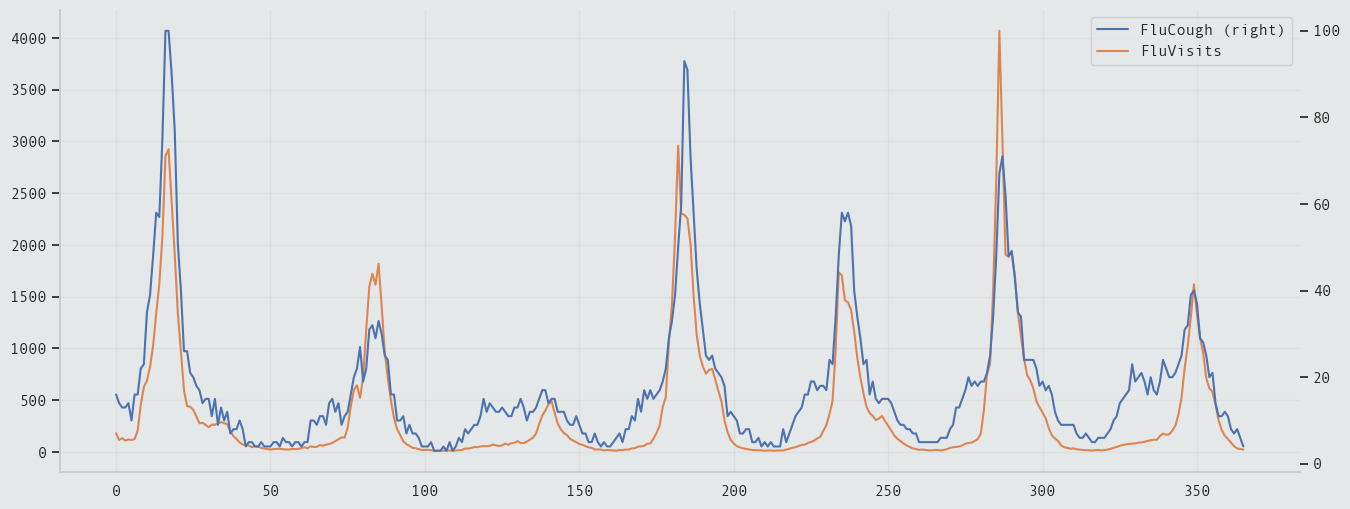

In [19]:
ax = dataset_origin.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)